In [25]:
!pip install spacy


In [26]:
!python -m spacy download en_core_web_lg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [27]:
import spacy
nlp = spacy.load('en_core_web_lg')

# Example usage
doc = nlp("This is an example sentence.")
for token in doc:
    print(token.text, token.lemma_, token.pos_)


This this PRON
is be AUX
an an DET
example example NOUN
sentence sentence NOUN
. . PUNCT


In [28]:
#spacy
#import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc



In [29]:
!pip install pyLDAvis


In [30]:
!pip install jsonlines

In [31]:
#gensim
import gensim
from gensim import corpora



In [32]:
#Visualization
from spacy import displacy
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt



In [33]:
#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines



In [34]:
#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Resume data set

In [35]:
df = pd.read_csv("Resume.csv")
df = df.reindex(np.random.permutation(df.index))
data = df.copy().iloc[
    0:200,
]
data.head()

,ID,Resume_str,Resume_html,Category
455,54067174,PATIENT ADVOCATE Summary Cus...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE
2453,31536294,MANAGED PRESSURE DRILLING FIELD SUPER...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
281,37242217,INFORMATION TECHNOLOGY CONSULTANT ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
819,28669770,PERSONAL TRAINER Summary H...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS
1450,30826569,"LECTURER, CHEF INSTRUCTOR, RESEARCHER...","<div class=""fontsize fontface vmargins hmargin...",CHEF


#Loading spaCy model

In [39]:
#nlp = spacy.load("en_core_web_lg")
#issue with lg large model, so we take small sm model
#nlp = spacy.load('en_core_web_sm')
skill_pattern_path = "jz_skill_patterns.jsonl"

#Entity ruler

In [45]:
#ruler = nlp.add_pipe("entity_ruler")
#previous rule apparently not necessary
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

#Skills

In [46]:
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):
    return list(set(x))

#Cleaning Resume Text

In [47]:
clean = []
for i in range(data.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        data["Resume_str"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    clean.append(review)

#Applying functions

In [48]:
data["Clean_Resume"] = clean
data["skills"] = data["Clean_Resume"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)
data.head()

,ID,Resume_str,Resume_html,Category,Clean_Resume,skills
455,54067174,PATIENT ADVOCATE Summary Cus...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE,patient advocate summary customer service prof...,"[certificate, queue]"
2453,31536294,MANAGED PRESSURE DRILLING FIELD SUPER...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,managed pressure drilling field supervisor pro...,"[marketing, shell, design, project management,..."
281,37242217,INFORMATION TECHNOLOGY CONSULTANT ...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY,information technology consultant career overv...,"[oracle, project management, application serve..."
819,28669770,PERSONAL TRAINER Summary H...,"<div class=""fontsize fontface vmargins hmargin...",FITNESS,personal trainer summary hard working seasoned...,"[interaction, schedule, business]"
1450,30826569,"LECTURER, CHEF INSTRUCTOR, RESEARCHER...","<div class=""fontsize fontface vmargins hmargin...",CHEF,lecturer chef instructor researcher recruiter ...,"[comprehension, support, certificate, business..."


#Visualisation

##Jobs Distribution

In [49]:
fig = px.histogram(
    data, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

#Skills

In [62]:
Job_cat = data["Category"].unique()
Job_cat = np.append(Job_cat, "ALL")
Job_cat

array(['ADVOCATE', 'AVIATION', 'INFORMATION-TECHNOLOGY', 'FITNESS',
       'CHEF', 'FINANCE', 'SALES', 'AGRICULTURE', 'PUBLIC-RELATIONS',
       'HR', 'TEACHER', 'CONSTRUCTION', 'DIGITAL-MEDIA',
       'BUSINESS-DEVELOPMENT', 'BANKING', 'ENGINEERING', 'APPAREL',
       'HEALTHCARE', 'CONSULTANT', 'ACCOUNTANT', 'DESIGNER', 'ARTS',
       'AUTOMOBILE', 'BPO', 'ALL'], dtype=object)

In [71]:
Total_skills = []
#if Job_Category == "INFORMATION-TECHNOLOGY":
fltr = data[data["Category"] == "INFORMATION-TECHNOLOGY"]["skills"]
for x in fltr:
        for i in x:
            Total_skills.append(i)
#else:
#    fltr = data["skills"]
#    for x in fltr:
#        for i in x:
#            Total_skills.append(i)

fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"Information-technology Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()

In [70]:
Total_skills

['oracle',
 'project management',
 'application server',
 'specification',
 'database',
 'visual basic',
 'computer network',
 'information management',
 'marketing',
 'design',
 'publishing',
 'content management',
 'wordpress',
 'business',
 'security',
 'mysql',
 'mobile',
 'electronic document',
 'medium',
 'analytics',
 'operating system',
 'documentation',
 'multimedia',
 'linux',
 'support',
 'workflow',
 'software',
 'business process',
 'centos',
 'deployment',
 'material',
 'ubuntu',
 'javascript',
 'java',
 'server',
 'advertising',
 'monitoring',
 'python',
 'support',
 'computer hardware',
 'computer programming',
 'design',
 'project management',
 'local area network',
 'testing',
 'software',
 'business',
 'network security',
 'security',
 'database',
 'router',
 'server',
 'wireless network',
 'tracking system',
 'project management',
 'schedule',
 'scanner',
 'database',
 'design',
 'testing',
 'security',
 'performance metric',
 'mechanical engineering',
 'operating s

#Most used words

Text(0.5, 1.0, 'Most Used Words in INFORMATION-TECHNOLOGY Resume')

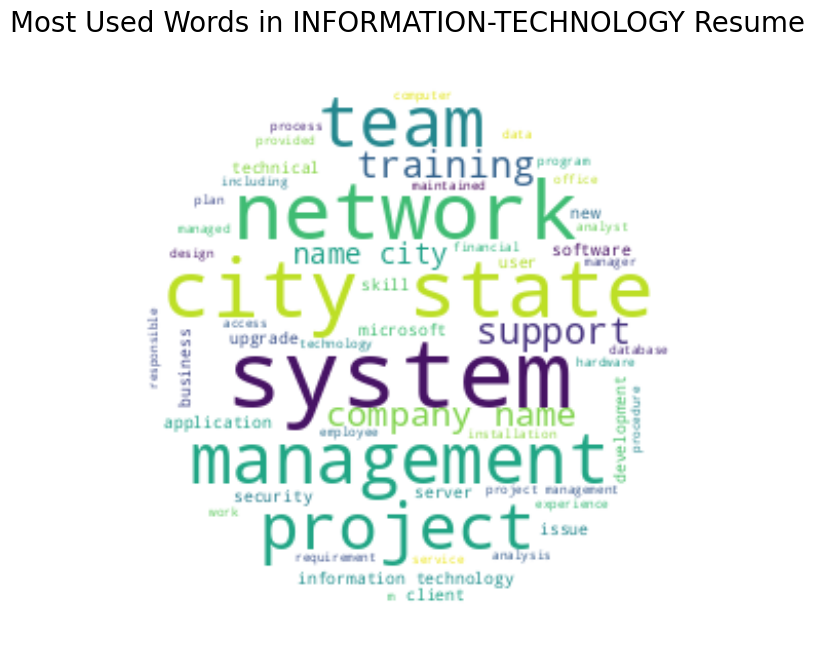

In [73]:
text = ""
for i in data[data["Category"] == "INFORMATION-TECHNOLOGY"]["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in INFORMATION-TECHNOLOGY Resume", fontsize=20)

#Entity Recognition

In [74]:
sent = nlp(data["Resume_str"].iloc[0])
displacy.render(sent, style="ent", jupyter=True)

#Dependency parsing

In [79]:
displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})

#Custom Entity Recognition

In our case, we have added a new entity called SKILL and is
displayed in gray color. I was not impressed by colors and I also wanted to add another entity called Job Description so I started experimenting with various parameters within `displace.<br>

Adding Job-Category into entity ruler.<br>
Adding custom colors to all categories.<br>
Adding gradient colors to SKILL and Job-Category<br>
You can see the result below as the new highlighted texts look beautiful.<br>

In [80]:
patterns = df.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-Category", "pattern": a}])

In [81]:
# options=[{"ents": "Job-Category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(data["Resume_str"].iloc[5])
displacy.render(sent, style="ent", jupyter=True, options=options)

#Your Resume

In [84]:
input_resume="Professional Summary Detail oriented and self-motivated, with a strong background in the energy sector leading managed pressure drilling operations.  Resourceful and adaptable due to the ever-changing nature of the military and the oil and gas industry. Desire to expand upon multi-skilled background through new challenges and opportunities.   Core Qualifications Results-oriented Excels in equipment  troubleshooting and situational problem solving. Reports generation and analysis Training and development Process Improvement Personnel Management Client Relations Customer Satisfaction Project Management Computer proficient Technically savvy  Experience Company Name City , State Managed Pressure Drilling Field Supervisor 07/2014 to Current Supervise the design, implementation, and execution of Managed Pressure Drilling projects for offshore drilling operations. Lead teams of 3-5 personnel in the integration and operation of pressure control systems and equipment tailored to the client's needs. Developed strong customer relations working directly with clients in the energy sector delivering MPD products and expertise. Adapted to many roles due to the recent down turn in the energy sector, including: project management, engineering assistance, logistics coordination, and technical consulting. Developed inventory control program for emerging markets abroad and continual process improvements for maintenance facilities. Managing client relationship and supporting marking and sales functions within the Organization Identifying and Managing Continuous Improvement Opportunities within the operation   Assist Sales and Marketing Functions in Identifying Opportunities to Expand Market share  MPD Control Systems Technician 06/2012 to 06/2014 Technical knowledge of pressure control systems to include: Programmable Logic Controllers, Human Interface Machines, Hydraulic Power Units, Pressure Control Chokes, Electrical Installations, Flow Meters, Computer Networking and Communications. Integration of hydraulic modeling, well data, and design to control systems. Operation of various Rotating Control Devices: HOLD 1500, HOLD 2500, RCD 5K Big Bore, ATR RCD 5K. Utilized Managed Pressure Drilling techniques in coordination with the client and operator to successfully drill otherwise un-drillable wells to completion. Utilized Lean Six Sigma techniques to drastically reduce waste and downtime associated with tool inventory and parts requisition process. Company Name City , State Electrical Branch Supervisor/ Plane Captain/ Aviation Electrician 07/2008 to 07/2011 Carrier Airborne Early Warning Squadron 115 - Supervised the Electrical Division in the repair and maintenance of aircraft electrical systems over 6 cruises while deployed to the Western Pacific Ocean on board USS George Washington.  Accountable for 7 sailors and 5 E-2C Hawkeye aircraft. Aircraft systems included: Flight controls, engine electrical installations, flight instrumentation, navigation, equipment cooling systems, power generation and supply. Awarded two Navy and Marine Corps Achievement medals and Enlisted Aviation Warfare Specialist. 2010 Junior Sailor of the Year. Company Name City , State Line Division Supervisor / Plane Captain / Aviation Electrician 08/2005 to 07/2008 Carrier Airborne Early Warning Squadron 120 Supervised crew of 15 in the daily inspection and servicing of twelve E2-C HawkEye and four C-2A Greyhound aircraft during 14 detachments.   Completed training prerequisites 4 months ahead of schedule, resulting in promotion to night supervisor.  Reduced fleet downtime by 30% by maintaining the aircraft in a ready status through improvements to maintenance and inspection processes. Education Bachelor of Arts : Business Administration 2017 Pennsylvania State University Expected graduation 2017 2016 Well Control School , City , State , USA IADC WellSHARP Supervisor Level Drilling Operations, Surface, Subsea 2016 MSTC , City , State , USA HUET & BOSIET   Helicopter Underwater Escape Training Basic Offshore Safety Induction and Emergency Training 2013 Schlumberger DPM Training , City , State , USA MPD / DPM Training (2012-2013) Well Bore Construction Drilling Fluids Intro to Directional Drilling BHA & Drill String Engineering Hydraulics for Drilling Operations Well Control Basics Dynamic Pressure Drilling Advanced Single Phase MPD , Multiphase MPD Operations Pressure Mud Cap Drilling   Advanced Auto-choke, Pressure Control 101 Control Systems Tech Basic & Advanced 2012 LoneStar College 2010 Central Texas College 2006 USN Advanced Electronics and Technical Training (2005-2006) MPD Projects/Clients Shell - Mars, Olympus, Perdido ConocoPhillips Alaska Walter Oil &Gas EnVen Energy Ventures Castex Energy W&T Offshore Chevron - Genesis, Lineham Creek Encana Corporation"

In [85]:
sent2 = nlp(input_resume)
displacy.render(sent2, style="ent", jupyter=True, options=options)